In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

class RandomWalk:
    states = []
    states_dict = {}
    reward = {} 
    v = {}
    actual_v = {'A':1/6,'B':2/6,'C':3/6,'D':4/6,'E':5/6}
    
    def __init__(self):
        #all states starting from left terminal to right terminal
        self.states = ['LT','A','B','C','D','E','RT']
        #mapping of state to their list number
        for i in range(len(self.states)):
            self.states_dict[self.states[i]]=i
            self.v[self.states[i]]=0.5
        self.v[self.states[0]]=0
        self.v[self.states[-1]]=0
        #reward for each state transition
        for i in self.states:
            for j in self.states:
                if(i!='LT' and i!='RT'):
                    self.reward[i+j] = 0
        self.reward['ERT']=1
    
    def get_next_state_and_reward(self,s):
        s_=s
        if(s=='RT' or s=='LT'):
            return (s_,0)
        rnd = np.random.randint(0,2)
        if(rnd==0):
            s_=self.states[self.states_dict[s]-1]
        else:
            s_=self.states[self.states_dict[s]+1]
        if(s_=='RT'):
            return (s_,1)
        else:
            return (s_,0)
        
    def MC(self,alpha,iters,plot=False):
        runs=100
        rms_error = np.zeros(iters)
        for z in range(runs):
            value = []
            temp=[]
            s_ret={}
            num_s_ret={}
            self.__init__()
            for i in 'ABCDE':
                temp.append(self.v[i])
                s_ret[i]=0
                num_s_ret[i]=0
            value.append(temp)
            for eps in range(iters):
                #print("\n")
                s_list=[]
                s="C"
                r = 0
                while(s!=self.states[0] and s!=self.states[-1]):
                    s_list.append(s)
                    s_,r=self.get_next_state_and_reward(s)
                    s=s_
                for s in s_list:
                    s_ret[s]*=num_s_ret[s]
                    s_ret[s]+=r
                    num_s_ret[s]+=1
                    s_ret[s]/=num_s_ret[s]
                    self.v[s]=self.v[s]+alpha*(s_ret[s]-self.v[s])
                summ=0
                for elem in self.actual_v:
                    summ+=np.power((self.actual_v[elem]-self.v[elem]),2)
                summ/=5
                rms_error[eps]+=np.power(summ,(1/2))
                temp = []
                for i in 'ABCDE':
                    temp.append(self.v[i])
                value.append(temp)
            if(plot and z==0):
                self.plot_TD0(value)
        return rms_error/runs
    
    def TD_0(self,alpha,iters,plot=False):
        runs=100
        rms_error = np.zeros(iters)
        for z in range(runs):
            value = []
            temp=[]
            self.__init__()
            for i in 'ABCDE':
                temp.append(self.v[i])
            value.append(temp)
            for eps in range(iters):
                #print("\n")
                s="C"
                while(s!=self.states[0] and s!=self.states[-1]):
                    s_,r=self.get_next_state_and_reward(s)
                    #print(s,r,end=" ")
                    self.v[s]=self.v[s]+alpha*(r+self.v[s_]-self.v[s])
                    s=s_
                summ=0
                for elem in self.actual_v:
                    summ+=np.power((self.actual_v[elem]-self.v[elem]),2)
                summ/=5
                rms_error[eps]+=np.power(summ,(1/2))
                temp = []
                for i in 'ABCDE':
                    temp.append(self.v[i])
                value.append(temp)
            if(plot and z==0):
                self.plot_TD0(value)
        return rms_error/runs
    
    def plot_TD0(self,value):
        fig1 = plt.figure(figsize=(5,5))
        ax1 = fig1.add_subplot(111)
        ax1.plot(np.arange(1,6,1),value[0])
        ax1.plot(np.arange(1,6,1),value[1])
        ax1.plot(np.arange(1,6,1),value[10])
        ax1.plot(np.arange(1,6,1),value[100])
        a=ax1.get_xticks().tolist()
        a[1]='A'
        a[2]=''
        a[3]='B'
        a[4]=''
        a[5]='C'
        a[6]=''
        a[7]='D'
        a[8]=''
        a[9]='E'
        ax1.set_xticklabels(a)
        temp=[]
        for i in 'ABCDE':
            temp.append(self.actual_v[i])
        ax1.plot(np.arange(1,6,1),temp)
        ax1.legend(['0', '1', '10', '100','True'])
        ax1.set_ylabel('Value')
        ax1.set_xlabel('State')
        plt.show()
    
    def plot_RMSE(self,rmse1,a1,rmse2,a2,rmse3,a3,rmse4,a4,rmse5,a5,rmse6,a6,rmse7,a7,iters):
        fig1 = plt.figure(figsize=(5,3))
        ax1 = fig1.add_subplot(111)
        ax1.plot(np.arange(1,iters+1,1),rmse1)
        ax1.plot(np.arange(1,iters+1,1),rmse2)
        ax1.plot(np.arange(1,iters+1,1),rmse3)
        ax1.plot(np.arange(1,iters+1,1),rmse4)
        ax1.plot(np.arange(1,iters+1,1),rmse5)
        ax1.plot(np.arange(1,iters+1,1),rmse6)
        ax1.plot(np.arange(1,iters+1,1),rmse7)
        ax1.legend([a1,a2,a3,a4,a5,a6,a7])
        ax1.set_ylabel('Averaged RMS error')
        ax1.set_xlabel('Episodes')
        plt.show()

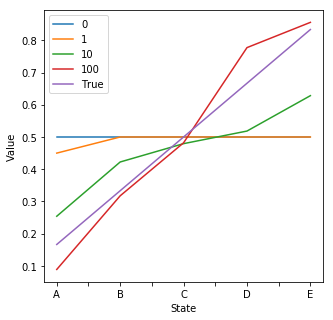

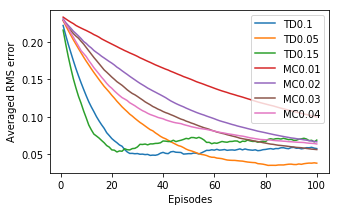

In [45]:
rwalk= RandomWalk()
rmse1= rwalk.TD_0(0.1,100,plot=True)
rmse2= rwalk.TD_0(0.05,100)
rmse3= rwalk.TD_0(0.15,100)
rmse4= rwalk.MC(0.01,100)
rmse5= rwalk.MC(0.02,100)
rmse6= rwalk.MC(0.03,100)
rmse7= rwalk.MC(0.04,100)
rwalk.plot_RMSE(rmse1,"TD"+str(0.1),rmse2,"TD"+str(0.05),rmse3,"TD"+str(0.15),rmse4,"MC"+str(0.01),rmse5,"MC"+str(0.02),rmse6,"MC"+str(0.03),rmse7,"MC"+str(0.04),100)